In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

saint george bm
grand river south east mu
illoqqortoormiut gl
castro cl
barmer in
rikitea pf
whangarei nz
hambantota lk
hithadhoo mv
rikitea pf
hami cn
pangnirtung ca
tuktoyaktuk ca
busselton au
tura ru
lebu cl
ushuaia ar
san ramon bo
mehamn no
bethel us
hohhot cn
safaqis tn
jamestown sh
yerbogachen ru
rikitea pf
avera pf
hilo us
udala in
ushuaia ar
beyla gn
santa maria da vitoria br
hermanus za
souillac mu
mana gf
tabiauea ki
thompson ca
hobart au
pangnirtung ca
belushya guba ru
saskylakh ru
west wendover us
mataura pf
saint-philippe re
qaanaaq gl
lebu cl
qaanaaq gl
yumen cn
albany au
nizhneyansk ru
bull savanna jm
sisophon kh
cidreira br
kenai us
goure ne
nova petropolis br
easton us
khorixas na
avarua ck
punta arenas cl
mar del plata ar
alibag in
kamenskoye ru
qaanaaq gl
yellowknife ca
ushuaia ar
upernavik gl
saint-pierre pm
cape town za
dolores ar
bengkulu id
faanui pf
bolungarvik is
rikitea pf
kodiak us
upernavik gl
codrington ag
bluff nz
comodoro rivadavia ar
hermanus za
jamestow

jamestown sh
bredasdorp za
ormara pk
butaritari ki
hilo us
punta arenas cl
kodiak us
richards bay za
samusu ws
narsaq gl
upernavik gl
pangnirtung ca
cabo san lucas mx
albany au
jamestown sh
basco ph
puerto ayora ec
itarema br
thompson ca
rikitea pf
chuy uy
san quintin mx
tsihombe mg
milkovo ru
barentsburg sj
sao filipe cv
karasjok no
hithadhoo mv
zhangye cn
brae gb
butaritari ki
mataura pf
cape town za
hilo us
okha ru
punta arenas cl
avarua ck
rum at
saint-philippe re
baiyin cn
mataura pf
hofn is
vila velha br
luderitz na
hithadhoo mv
rikitea pf
victoria sc
belushya guba ru
rio grande br
ushuaia ar
ushuaia ar
bandarbeyla so
faanui pf
rikitea pf
tiksi ru
puerto ayora ec
cayenne gf
guymon us
fortuna us
bambous virieux mu
ocampo mx
martapura id
saint-pierre pm
belushya guba ru
conceicao do araguaia br
mataura pf
isla mujeres mx
buala sb
rikitea pf
rincon an
busselton au
inta ru
saint-philippe re
sitka us
sorland no
flinders au
busselton au
aksarka ru
cape town za
helong cn
ushuaia ar
buri

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Handling API Errors w Try-Except blocks
# ...... if theres an error, we decide what happens next

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint george
Processing Record 2 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | barmer
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | whangarei
Processing Record 8 of Set 1 | hambantota
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | hami
Processing Record 11 of Set 1 | pangnirtung
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | tura
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | san ramon
Processing Record 18 of Set 1 | mehamn
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | hohhot
Processing Record 21 of Set 1 | safaqis
City not found. Ski

Processing Record 38 of Set 4 | muscatine
Processing Record 39 of Set 4 | faya
Processing Record 40 of Set 4 | puerto suarez
Processing Record 41 of Set 4 | kannur
Processing Record 42 of Set 4 | bargal
City not found. Skipping...
Processing Record 43 of Set 4 | carnarvon
Processing Record 44 of Set 4 | ternuvate
Processing Record 45 of Set 4 | snezhnogorsk
Processing Record 46 of Set 4 | port alfred
Processing Record 47 of Set 4 | sabang
Processing Record 48 of Set 4 | mikhaylovka
Processing Record 49 of Set 4 | la macarena
Processing Record 50 of Set 4 | butaritari
Processing Record 1 of Set 5 | guiuan
Processing Record 2 of Set 5 | adrar
Processing Record 3 of Set 5 | leningradskiy
Processing Record 4 of Set 5 | taoudenni
Processing Record 5 of Set 5 | yaan
Processing Record 6 of Set 5 | rawson
Processing Record 7 of Set 5 | barra do garcas
Processing Record 8 of Set 5 | tiarei
Processing Record 9 of Set 5 | primorka
Processing Record 10 of Set 5 | porto novo
Processing Record 11 of

Processing Record 27 of Set 8 | martapura
Processing Record 28 of Set 8 | conceicao do araguaia
Processing Record 29 of Set 8 | isla mujeres
Processing Record 30 of Set 8 | rincon
Processing Record 31 of Set 8 | inta
Processing Record 32 of Set 8 | sitka
Processing Record 33 of Set 8 | sorland
Processing Record 34 of Set 8 | aksarka
Processing Record 35 of Set 8 | helong
Processing Record 36 of Set 8 | burica
City not found. Skipping...
Processing Record 37 of Set 8 | vila franca do campo
Processing Record 38 of Set 8 | chapais
Processing Record 39 of Set 8 | maceio
Processing Record 40 of Set 8 | pringsewu
Processing Record 41 of Set 8 | debica
Processing Record 42 of Set 8 | alugan
Processing Record 43 of Set 8 | ketchikan
Processing Record 44 of Set 8 | adre
Processing Record 45 of Set 8 | maumere
Processing Record 46 of Set 8 | caucaia
Processing Record 47 of Set 8 | salinas
Processing Record 48 of Set 8 | dawei
Processing Record 49 of Set 8 | mackay
Processing Record 50 of Set 8 |

Processing Record 14 of Set 12 | leh
Processing Record 15 of Set 12 | kidal
Processing Record 16 of Set 12 | pindi gheb
Processing Record 17 of Set 12 | burnie
Processing Record 18 of Set 12 | quezon
Processing Record 19 of Set 12 | omboue
Processing Record 20 of Set 12 | falealupo
City not found. Skipping...
Processing Record 21 of Set 12 | killin
Processing Record 22 of Set 12 | kholmogory
Processing Record 23 of Set 12 | nizhniy baskunchak
Processing Record 24 of Set 12 | charyshskoye
Processing Record 25 of Set 12 | ushumun
Processing Record 26 of Set 12 | pekalongan
Processing Record 27 of Set 12 | nelspruit
Processing Record 28 of Set 12 | bucerias
Processing Record 29 of Set 12 | hailey
Processing Record 30 of Set 12 | cherskiy
Processing Record 31 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 32 of Set 12 | inhambane
Processing Record 33 of Set 12 | bourail
Processing Record 34 of Set 12 | korla
Processing Record 35 of Set 12 | kodinsk
Processing Record 36 

In [12]:
# Create a DataFrame of city weather data

In [13]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint George,37.1041,-113.5841,89.35,51,1,1.01,US,2021-07-24 15:41:37
1,Castro,-24.7911,-50.0119,70.88,39,0,7.52,BR,2021-07-24 15:41:38
2,Barmer,25.7500,71.3833,91.15,53,97,18.16,IN,2021-07-24 15:41:38
3,Rikitea,-23.1203,-134.9692,68.70,55,0,2.98,PF,2021-07-24 15:41:38
4,Whangarei,-35.7317,174.3239,53.49,94,76,6.38,NZ,2021-07-24 15:41:39


In [15]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint George,US,2021-07-24 15:41:37,37.1041,-113.5841,89.35,51,1,1.01
1,Castro,BR,2021-07-24 15:41:38,-24.7911,-50.0119,70.88,39,0,7.52
2,Barmer,IN,2021-07-24 15:41:38,25.7500,71.3833,91.15,53,97,18.16
3,Rikitea,PF,2021-07-24 15:41:38,-23.1203,-134.9692,68.70,55,0,2.98
4,Whangarei,NZ,2021-07-24 15:41:39,-35.7317,174.3239,53.49,94,76,6.38


In [20]:
# Create the output file (CSV).
output_data_file = "Weather Data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID") # will export the DataFrame to a CSV file

In [21]:
# create plots for the Data

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

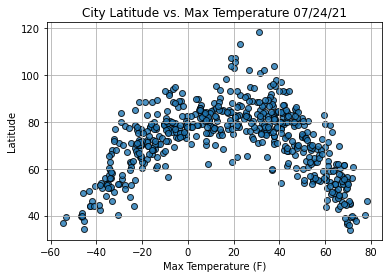

In [28]:
# Import the Time Module
import time

# build plot of Lat v max temp
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# incorporate other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.xlabel("Max Temperature (F)")
plt.ylabel("Latitude")
plt.grid(True)

plt.savefig("Weather Data/Fig1.png")
plt.show()

In [29]:
# create a scatter plot of latitude v humidity

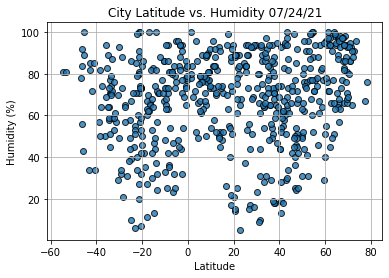

In [30]:
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Weather Data/Fig2.png")
# Show plot.
plt.show()

In [31]:
# plot latitude v cloudiness

In [ ]:
plt.scatter(lats, , edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Weather Data/Fig2.png")
# Show plot.
plt.show()